<a href="https://colab.research.google.com/github/aschelin/Coalitions/blob/main/partidos_coligacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the usual: pandas, matplotlib:


In [3]:

# importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt


Data set path: in my case, the file is in gdrive

In [1]:
dataset_path = "https://raw.githubusercontent.com/aschelin/Coalitions/main/consulta_coligacao_2020_BRASIL.csv"


In [5]:
df = pd.read_csv(dataset_path,encoding='latin',sep=';')

# Data cleaning:

Check if everything is ok:

In [6]:
df.head()

,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SITUACAO_LEGENDA,DS_SITUACAO
0,SP,61190,ALTINÓPOLIS,11,PREFEITO,COLIGACAO,10,REPUBLICANOS,REPUBLICANOS,RENOVAÇÃO E LIBERDADE,REPUBLICANOS / MDB / PSDB,D,DEFERIDO
1,MS,98094,SÃO GABRIEL DO OESTE,12,VICE-PREFEITO,COLIGACAO,10,REPUBLICANOS,REPUBLICANOS,São Gabriel do Oeste Pode Mais,PSD / PSL / REPUBLICANOS / PODE,D,DEFERIDO
2,SP,63258,CATIGUÁ,12,VICE-PREFEITO,COLIGACAO,10,REPUBLICANOS,REPUBLICANOS,CATIGUÁ NÃO PODE PARAR,REPUBLICANOS / PTB / MDB / CIDADANIA,D,DEFERIDO
3,RS,85197,ARROIO DO MEIO,12,VICE-PREFEITO,COLIGACAO,10,REPUBLICANOS,REPUBLICANOS,JUNTOS PARA RENOVAR,REPUBLICANOS / PP / PDT,D,DEFERIDO
4,PE,25038,PANELAS,12,VICE-PREFEITO,COLIGACAO,10,REPUBLICANOS,REPUBLICANOS,PANELAS PODE MAIS,PSB / REPUBLICANOS,D,DEFERIDO


Create a dataframe with two columns: main party and party coalition

In [ ]:
df_colg = df[["SG_PARTIDO","DS_COMPOSICAO_COLIGACAO"]]

In [ ]:
df_colg

,SG_PARTIDO,DS_COMPOSICAO_COLIGACAO
0,REPUBLICANOS,REPUBLICANOS / MDB / PSDB
1,REPUBLICANOS,PSD / PSL / REPUBLICANOS / PODE
2,REPUBLICANOS,REPUBLICANOS / PTB / MDB / CIDADANIA
3,REPUBLICANOS,REPUBLICANOS / PP / PDT
4,REPUBLICANOS,PSB / REPUBLICANOS
...,...,...
139057,CIDADANIA,CIDADANIA
139058,CIDADANIA,CIDADANIA
139059,CIDADANIA,CIDADANIA
139060,CIDADANIA,CIDADANIA


Now we have to do some data formating: we have to separate the parties from the second column in different cells:

In [ ]:
new = df_colg.DS_COMPOSICAO_COLIGACAO.str.split(pat="/", n=-1,expand = True) 

In [ ]:

new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,REPUBLICANOS,MDB,PSDB,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,PSD,PSL,REPUBLICANOS,PODE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,REPUBLICANOS,PTB,MDB,CIDADANIA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,REPUBLICANOS,PP,PDT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,PSB,REPUBLICANOS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Renaming the columns:

In [ ]:
new.columns = ['col_' + str(ind) for ind in range(0,len(new.columns))]

And, once again, we rename col_0:

---



In [ ]:
new.rename(columns = {'col_0':'Partido'}, inplace = True)

In [ ]:
new.head()

,Partido,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,REPUBLICANOS,MDB,PSDB,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,PSD,PSL,REPUBLICANOS,PODE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,REPUBLICANOS,PTB,MDB,CIDADANIA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,REPUBLICANOS,PP,PDT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,PSB,REPUBLICANOS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Create a list with column names:

In [ ]:

column_list = new.columns.tolist()


In [ ]:
id_vars_list = column_list[0]


In [ ]:
id_vars_list

'Partido'

Transform the multi column data into a two column dataframe:

In [ ]:
df = pd.melt(new, id_vars=id_vars_list, 
             value_name="colg").drop(['variable'],axis=1)

In [ ]:
df.head()

,Partido,colg
0,REPUBLICANOS,MDB
1,PSD,PSL
2,REPUBLICANOS,PTB
3,REPUBLICANOS,PP
4,PSB,REPUBLICANOS


Length of the new dataframe

In [ ]:
len(df)

2642178

Getting rid blank space before and after the parties names:

In [ ]:
df['colg']=df['colg'].str.strip()

In [ ]:
df['Partido']=df['Partido'].str.strip()

Just checking the parties:

In [ ]:
(df.Partido.unique())

array(['REPUBLICANOS', 'PSD', 'PSB', 'PSL', 'PSDB', 'MDB', 'PSC', 'PRTB',
       'PMN', 'PP', 'CIDADANIA', 'PDT', 'PODE', 'PL', 'SOLIDARIEDADE',
       'PT', 'PTB', 'PROS', 'REDE', 'PV', 'PMB', 'PC do B', 'PATRIOTA',
       'PSOL', 'DEM', 'AVANTE', 'PTC', 'DC', 'PCO', 'NOVO', 'UP', 'PCB',
       'PSTU'], dtype=object)

Removing duplicates:

In [ ]:
df2 = df.drop_duplicates(subset=["Partido", "colg"])


In [ ]:
df2.describe()

,Partido,colg
count,771,738
unique,33,31
top,PT,PT
freq,29,28


Finally, we start creating the network. First, import the package:

In [ ]:
import networkx as nx
G = nx.Graph()

Now assign the dataframe:

In [ ]:
G = nx.from_pandas_edgelist(df, 'Partido', 'colg')


Our first network:

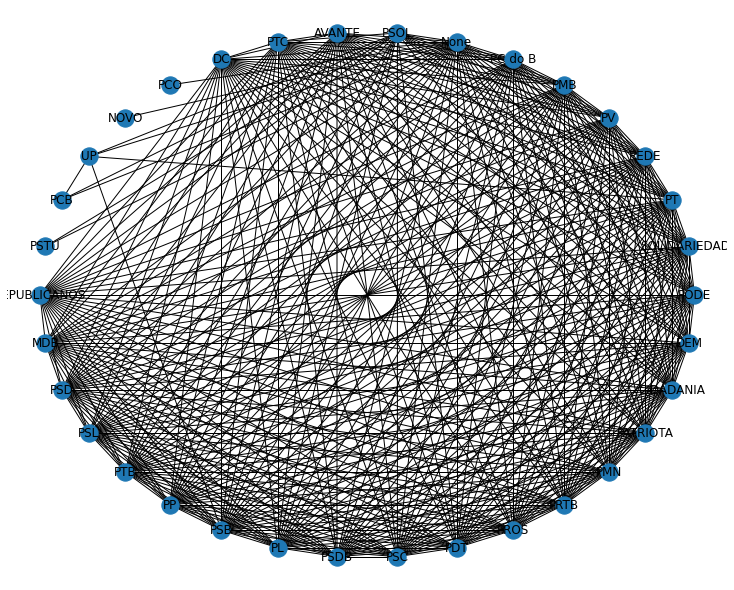

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

We can check each node individually:

In [ ]:
G['NOVO']

AtlasView({None: {}})

To check the name of the nodes:

In [ ]:
G.nodes

NodeView(('REPUBLICANOS', 'MDB', 'PSD', 'PSL', 'PTB', 'PP', 'PSB', 'PL', 'PSDB', 'PSC', 'PDT', 'PROS', 'PRTB', 'PMN', 'PATRIOTA', 'CIDADANIA', 'DEM', 'PODE', 'SOLIDARIEDADE', 'PT', 'REDE', 'PV', 'PMB', 'PC do B', None, 'PSOL', 'AVANTE', 'PTC', 'DC', 'PCO', 'NOVO', 'UP', 'PCB', 'PSTU'))

There is a node called 'None', with is for the cases where there is no coalitions:

In [ ]:
G[None]

AtlasView({'PV': {}, 'PSOL': {}, 'PSB': {}, 'PL': {}, 'PSDB': {}, 'PRTB': {}, 'PATRIOTA': {}, 'PSD': {}, 'PC do B': {}, 'AVANTE': {}, 'SOLIDARIEDADE': {}, 'PROS': {}, 'REPUBLICANOS': {}, 'PP': {}, 'PDT': {}, 'PMB': {}, 'PTC': {}, 'DEM': {}, 'DC': {}, 'CIDADANIA': {}, 'PCO': {}, 'NOVO': {}, 'PMN': {}, 'UP': {}, 'PSL': {}, 'PT': {}, 'PSC': {}, 'PCB': {}, 'MDB': {}, 'PTB': {}, 'REDE': {}, 'PSTU': {}, 'PODE': {}})

To remove the None node:

In [ ]:
df3 = df2.dropna()
df3

,Partido,colg
0,REPUBLICANOS,MDB
1,PSD,PSL
2,REPUBLICANOS,PTB
3,REPUBLICANOS,PP
4,PSB,REPUBLICANOS
...,...,...
432724,PSB,PMB
559051,REPUBLICANOS,PSOL
565703,PSOL,PTB
838830,PTC,REDE


It is also good to change the name of PC do B to PCDOB:

In [ ]:

df3.replace('PC do B','PCDOB',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


And now we create a new network:

In [ ]:
G1 = nx.Graph()

In [ ]:
G1 = nx.from_pandas_edgelist(df2, 'Partido', 'colg')


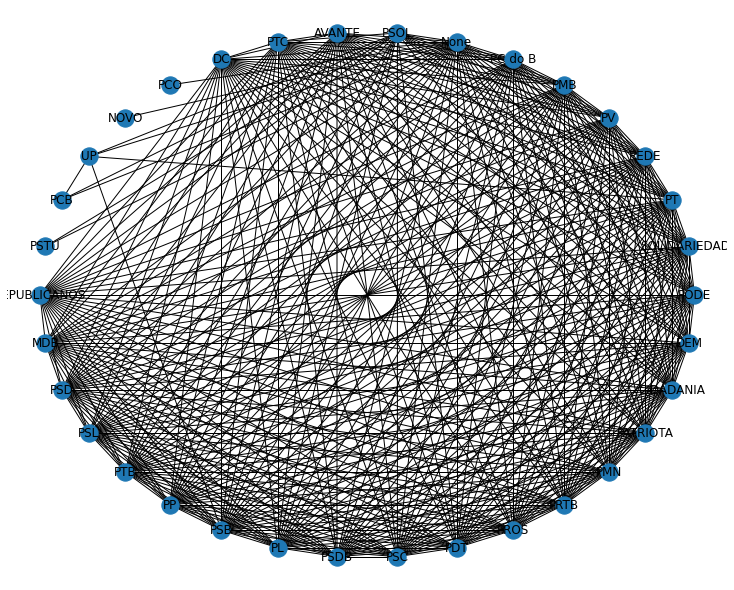

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G1, with_labels=True)

# Complex Network Analysis

Now we will do some complex network analysis by computing some newtork metrics:

The first measurement is the size of the networks with the number of nodes and edges:

In [ ]:

len(G1.nodes())
nx.number_of_nodes(G1)


34

In [ ]:
len(G1.edges()) # Number of edges
nx.number_of_edges(G1)


407

We can also calculate the number of non-existent edges. This quantifies the number of possible edges could but dont happen in your network:

In [ ]:
len(list(nx.non_edges(G1)))


154

An important quantity is the networks density:

In [ ]:
nx.density(G1)


0.7254901960784313

Up to now, we have calculated macro properties of our network. Next, we will calculate some micro properties

The number of neighbors:

In [ ]:
alters2 = list(nx.all_neighbors(G1, 'REDE'))
print(alters2)
print(len(alters2))


['PSC', 'PMB', 'PV', 'PATRIOTA', 'PSB', 'PP', 'REPUBLICANOS', 'PSD', 'MDB', 'PSOL', 'PL', 'PDT', 'CIDADANIA', 'PODE', 'PMN', 'PROS', 'PC do B', 'PT', 'SOLIDARIEDADE', 'PTB', 'AVANTE', 'DEM', 'PSDB', None, 'DC', 'PSL', 'PRTB', 'PTC']
28


Clustering coefficient:

In [ ]:
cc = nx.clustering(nx.Graph(G1), 'REDE')
print(cc)

0.9735449735449735


If the clustering coefficient of a node is 1, the node participates in every
possible triangle involving any pair of its neighbors; the egocentric network
of such a node is a complete graph. If the clustering coefficient of a node is
0, no two nodes in the neighborhood are connected; the egocentric network
of such node is a star. Think of the clustering coefficient as a measure of
“stardom.”


Average Clustering:

In [ ]:
acc = nx.average_clustering(nx.Graph(G1))
print(acc)


AttributeError: ignored

The average clustering coefficient is different from the clustering
coefficient of the whole network—the fraction of all possible triangles that
exist in the network. The latter is known as transitivity, a measure of transitive
closure

In [ ]:
trans = nx.transitivity(G1)
print(trans)


0.9602568875651526


In [ ]:
ecc = nx.eccentricity(nx.Graph(G1))
print(ecc['REDE'])


TypeError: ignored

# Attributes 

Now we classify each node according to their ideology:

In [ ]:
dataset_path2 = "/content/drive/My Drive/Data/classificacao_partidos.xlsx"

In [ ]:
df_class = pd.read_excel(dataset_path2)

In [ ]:
df_class.head()

,Nome,Fernandes1995,Coppedge1997,Globo2016,BB2017,ClaudioCouto2018,FolhaSP2018,Congresso2019
0,Avante,0,desconhecido,centro,esquerda conservadora,0,centro fisiológico,centro
1,DC,0,secular de centro-direita,centro,0,0,centro fisiológico,direita
2,DEM,direita,secular de direita,centro,direita conservadora,direita,"""direita que virou centro""",direita
3,MDB,centro,secular de centro,centro,direita conservadora,centro-direita,centro-esquerda liberal,centro
4,NOVO,0,0,centro-direita,0,direita,0,direita


Leave all party names in UPPERCASE:

In [ ]:
df_class['Nome'] = df_class['Nome'].str.upper() 
 

In [ ]:
df_class.set_index('Nome',inplace=True)


In [ ]:
data= df_class['Congresso2019']
data

Nome
AVANTE             centro
DC                direita
DEM               direita
MDB                centro
NOVO              direita
PATRIOTA          direita
PCB                     0
PCDOB            esquerda
PCO                     0
PDT              esquerda
PL                direita
PMB               direita
PMN              esquerda
PODE              direita
PP                direita
CIDADANIA        esquerda
REPUBLICANOS      direita
PROS               centro
PRTB              direita
PSB              esquerda
PSC               direita
PSD               direita
PSDB               centro
PSL               direita
PSOL             esquerda
PSTU                    0
PT               esquerda
PTB               direita
PTC               direita
PV               esquerda
REDE             esquerda
SOLIDARIEDADE      centro
UP                      0
Name: Congresso2019, dtype: object

Translate do english:

In [ ]:
data.replace('centro','Center',inplace=True)
data.replace('direita','Right',inplace=True)
data.replace('esquerda','Left',inplace=True)

Export file to use in Flourish:

In [ ]:
data.to_csv('class_ideologico.csv',index=True,header=True)

In [ ]:
data_dict = data.to_dict()
data_dict

{'AVANTE': 'centro',
 'CIDADANIA': 'esquerda',
 'DC': 'direita',
 'DEM': 'direita',
 'MDB': 'centro',
 'NOVO': 'direita',
 'PATRIOTA': 'direita',
 'PCB': 0,
 'PCDOB': 'esquerda',
 'PCO': 0,
 'PDT': 'esquerda',
 'PL': 'direita',
 'PMB': 'direita',
 'PMN': 'esquerda',
 'PODE': 'direita',
 'PP': 'direita',
 'PROS': 'centro',
 'PRTB': 'direita',
 'PSB': 'esquerda',
 'PSC': 'direita',
 'PSD': 'direita',
 'PSDB': 'centro',
 'PSL': 'direita',
 'PSOL': 'esquerda',
 'PSTU': 0,
 'PT': 'esquerda',
 'PTB': 'direita',
 'PTC': 'direita',
 'PV': 'esquerda',
 'REDE': 'esquerda',
 'REPUBLICANOS': 'direita',
 'SOLIDARIEDADE': 'centro',
 'UP': 0}

In [ ]:
df3.Partido

0          REPUBLICANOS
1                   PSD
2          REPUBLICANOS
3          REPUBLICANOS
4                   PSB
               ...     
432724              PSB
559051     REPUBLICANOS
565703             PSOL
838830              PTC
1113846              PL
Name: Partido, Length: 738, dtype: object

In [ ]:
df3["val"] = df3["Partido"].map(data_dict)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,Partido,colg,val
0,REPUBLICANOS,MDB,direita
1,PSD,PSL,direita
2,REPUBLICANOS,PTB,direita
3,REPUBLICANOS,PP,direita
4,PSB,REPUBLICANOS,esquerda
...,...,...,...
432724,PSB,PMB,esquerda
559051,REPUBLICANOS,PSOL,direita
565703,PSOL,PTB,esquerda
838830,PTC,REDE,direita


In [ ]:
df3.val.unique()

array(['direita', 'esquerda', 'centro', 0], dtype=object)

In [ ]:
df3['val'] = df3['val'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,Partido,colg,val
0,REPUBLICANOS,MDB,direita
1,PSD,PSL,direita
2,REPUBLICANOS,PTB,direita
3,REPUBLICANOS,PP,direita
4,PSB,REPUBLICANOS,esquerda
...,...,...,...
432724,PSB,PMB,esquerda
559051,REPUBLICANOS,PSOL,direita
565703,PSOL,PTB,esquerda
838830,PTC,REDE,direita


In [ ]:
df3.val.unique()

array(['direita', 'esquerda', 'centro', 0], dtype=object)

# Export data to use in Flourish:

In [ ]:
df_count.to_csv ('teste2020.csv', index = False, header=True)

# Testing different network layouts:
(and other stuff)

In [ ]:
G2= nx.Graph()

In [ ]:
G2 = nx.from_pandas_edgelist(df3, 'Partido', 'colg','val')

In [ ]:
G2['PSL']

AtlasView({'PSD': {'val': 'direita'}, 'REPUBLICANOS': {'val': 'direita'}, 'PL': {'val': 'direita'}, 'PMN': {'val': 'esquerda'}, 'PT': {'val': 'direita'}, 'MDB': {'val': 'centro'}, 'PSDB': {'val': 'centro'}, 'PATRIOTA': {'val': 'direita'}, 'PODE': {'val': 'direita'}, 'DEM': {'val': 'direita'}, 'CIDADANIA': {'val': 'esquerda'}, 'PP': {'val': 'direita'}, 'PSC': {'val': 'direita'}, 'PTC': {'val': 'direita'}, 'PRTB': {'val': 'direita'}, 'SOLIDARIEDADE': {'val': 'centro'}, 'PV': {'val': 'esquerda'}, 'PTB': {'val': 'direita'}, 'AVANTE': {'val': 'direita'}, 'PDT': {'val': 'direita'}, 'PSB': {'val': 'esquerda'}, 'PROS': {'val': 'centro'}, 'DC': {'val': 'direita'}, 'PC do B': {'val': 0}, 'PMB': {'val': 'direita'}, 'REDE': {'val': 'esquerda'}})

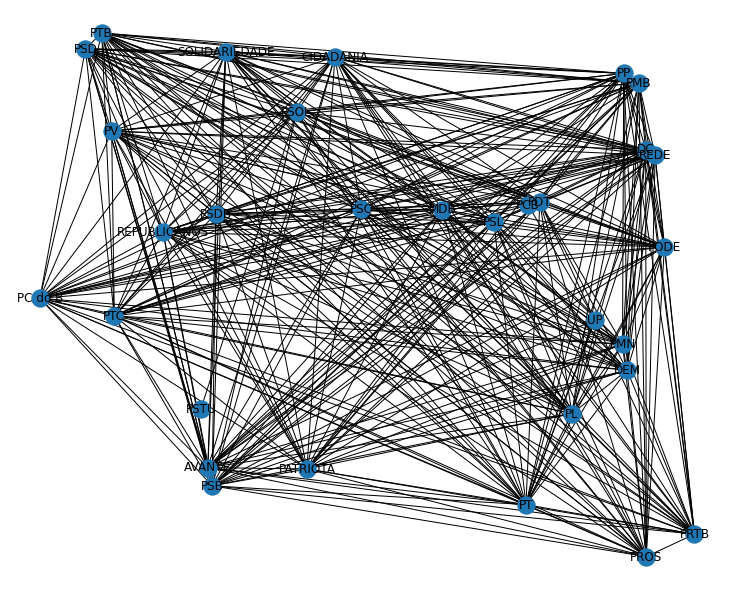

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_random(G2,with_labels=True)

In [ ]:
coalition_dict = {
    "centro" : 'green',
    "direita" : 'blue',
    "esquerda" : 'red',
    "0" : 'orange'
}

coalition_dict

{'0': 'orange', 'centro': 'green', 'direita': 'blue', 'esquerda': 'red'}

In [ ]:
df3["val_num"] = df3["val"].map(coalition_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,Partido,colg,val,val_num
0,REPUBLICANOS,MDB,direita,blue
1,PSD,PSL,direita,blue
2,REPUBLICANOS,PTB,direita,blue
3,REPUBLICANOS,PP,direita,blue
4,PSB,REPUBLICANOS,esquerda,red
...,...,...,...,...
432724,PSB,PMB,esquerda,red
559051,REPUBLICANOS,PSOL,direita,blue
565703,PSOL,PTB,esquerda,red
838830,PTC,REDE,direita,blue


In [ ]:
df3.val_num
            

0          blue
1          blue
2          blue
3          blue
4           red
           ... 
432724      red
559051     blue
565703      red
838830     blue
1113846    blue
Name: val_num, Length: 738, dtype: category
Categories (3, object): ['blue', 'green', 'red']

In [ ]:
G2 = nx.from_pandas_edgelist(df3, 'Partido', 'colg','val_num')

In [ ]:
G2.nodes()


NodeView(('REPUBLICANOS', 'MDB', 'PSD', 'PSL', 'PTB', 'PP', 'PSB', 'PL', 'PSDB', 'PSC', 'PDT', 'PROS', 'PRTB', 'PMN', 'PATRIOTA', 'CIDADANIA', 'DEM', 'PODE', 'SOLIDARIEDADE', 'PT', 'REDE', 'PV', 'PMB', 'PC do B', 'AVANTE', 'PTC', 'PSOL', 'DC', 'PCB', 'UP', 'PSTU'))

In [ ]:
data

Nome
REPUBLICANOS      direita
MDB                centro
PSD               direita
PSL               direita
PTB               direita
PP                direita
PSB              esquerda
PL                direita
PSDB               centro
PSC               direita
PDT              esquerda
PROS               centro
PRTB              direita
PMN              esquerda
PATRIOTA          direita
CIDADANIA        esquerda
DEM               direita
PODE              direita
SOLIDARIEDADE      centro
PT               esquerda
REDE             esquerda
PV               esquerda
PMB               direita
PC do B               NaN
NaN                   NaN
PSOL             esquerda
AVANTE             centro
PTC               direita
DC                direita
PCO                   NaN
NOVO                  NaN
UP                      0
PCB                     0
PSTU                    0
Name: Congresso2019, dtype: object

In [ ]:
data=data.reindex(G.nodes())



In [ ]:
carac = pd.DataFrame(data)


In [ ]:
carac['Congresso2019']=pd.Categorical(carac['Congresso2019'])
carac['Congresso2019'].cat.codes


Nome
REPUBLICANOS     2
MDB              1
PSD              2
PSL              2
PTB              2
PP               2
PSB              3
PL               2
PSDB             1
PSC              2
PDT              3
PROS             1
PRTB             2
PMN              3
PATRIOTA         2
CIDADANIA        3
DEM              2
PODE             2
SOLIDARIEDADE    1
PT               3
REDE             3
PV               3
PMB              2
PC do B         -1
NaN             -1
PSOL             3
AVANTE           1
PTC              2
DC               2
PCO             -1
NOVO            -1
UP               0
PCB              0
PSTU             0
dtype: int8

In [ ]:
carac.dropna(axis=0)

,Congresso2019
Nome,
REPUBLICANOS,direita
MDB,centro
PSD,direita
PSL,direita
PTB,direita
PP,direita
PSB,esquerda
PL,direita
PSDB,centro


In [ ]:
}carac

,Congresso2019
Nome,
REPUBLICANOS,direita
MDB,centro
PSD,direita
PSL,direita
PTB,direita
PP,direita
PSB,esquerda
PL,direita
PSDB,centro


ValueError: ignored

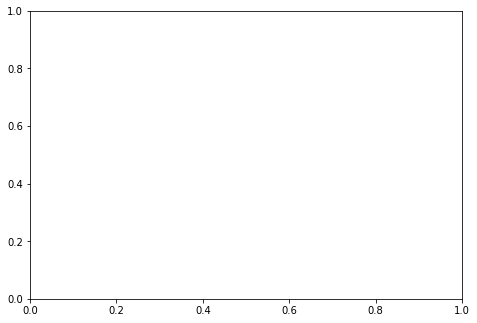

In [ ]:
nx.draw(G2, with_labels=True, node_color=carac['Congresso2019'].cat.codes, cmap=plt.cm.Set1)


In [ ]:
carac

,Congresso2019
Nome,
REPUBLICANOS,direita
MDB,centro
PSD,direita
PSL,direita
PTB,direita
PP,direita
PSB,esquerda
PL,direita
PSDB,centro


# Counting Duplicates:

In [ ]:
df_count = df.groupby(df.columns.tolist(),as_index=False).size()
df_count.head()


,Partido,colg,size
0,AVANTE,CIDADANIA,190
1,AVANTE,DC,28
2,AVANTE,DEM,284
3,AVANTE,MDB,360
4,AVANTE,PATRIOTA,156


In [ ]:
df_count

,Partido,colg,size
0,AVANTE,CIDADANIA,190
1,AVANTE,DC,28
2,AVANTE,DEM,284
3,AVANTE,MDB,360
4,AVANTE,PATRIOTA,156
...,...,...,...
733,SOLIDARIEDADE,REDE,46
734,SOLIDARIEDADE,REPUBLICANOS,286
735,UP,PCB,20
736,UP,PSOL,22


In [ ]:
}